In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prosenjitmondol","key":"92a9489b7f019d50adb2ad113f265019"}'}

In [3]:
# create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          10917        185  1.0              
rohitgrewal/airlines-flights-data                                Airlines Flights Data                                  2440299  2025-07-29 09:16:00.463000          22143        404  1.0              
pratyushpuri/multilingual-mobile-app-reviews-dataset-2025        Multilingual Mobile App Review Dataset August 2025      136331  2025-07-31 03:09:08.217000           3643        142  1.0          

In [7]:
# Dataset api link from kaggle
!kaggle competitions download -c dog-vs-cat-vs-bird

  0% 0.00/40.4M [00:00<?, ?B/s]
100% 40.4M/40.4M [00:00<00:00, 829MB/s]


In [8]:
# unzip the dataset
!unzip dog-vs-cat-vs-bird.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/cat_6529.png  
  inflating: dataset/train/cat_653.png  
  inflating: dataset/train/cat_6533.png  
  inflating: dataset/train/cat_6538.png  
  inflating: dataset/train/cat_6541.png  
  inflating: dataset/train/cat_6544.png  
  inflating: dataset/train/cat_6545.png  
  inflating: dataset/train/cat_6549.png  
  inflating: dataset/train/cat_6556.png  
  inflating: dataset/train/cat_6557.png  
  inflating: dataset/train/cat_6560.png  
  inflating: dataset/train/cat_6561.png  
  inflating: dataset/train/cat_6565.png  
  inflating: dataset/train/cat_6568.png  
  inflating: dataset/train/cat_6569.png  
  inflating: dataset/train/cat_6573.png  
  inflating: dataset/train/cat_6574.png  
  inflating: dataset/train/cat_6575.png  
  inflating: dataset/train/cat_6581.png  
  inflating: dataset/train/cat_6582.png  
  inflating: dataset/train/cat_6591.png  
  inflating: dataset/train/cat_6600.png  
  inflating: dataset/train

## Load sample images

### Subtask:
Select and load a few sample images from each category (dog, cat, bird) for visualization.


**Reasoning**:
Select and load sample images from each category for visualization in the next step.



In [9]:
import os
import cv2

# Define paths to image directories
train_dir = '/content/dataset/train'
dog_dir = os.path.join(train_dir, 'dog')
cat_dir = os.path.join(train_dir, 'cat')
bird_dir = os.path.join(train_dir, 'bird')

# Get list of filenames for each category
dog_files = os.listdir(dog_dir)
cat_files = os.listdir(cat_dir)
bird_files = os.listdir(bird_dir)

# Select a few sample filenames from each category
num_samples = 3
sample_dog_files = dog_files[:num_samples]
sample_cat_files = cat_files[:num_samples]
sample_bird_files = bird_files[:num_samples]

# Load the sample images and store them with their labels
sample_images = []
for filename in sample_dog_files:
    img_path = os.path.join(dog_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'dog'})

for filename in sample_cat_files:
    img_path = os.path.join(cat_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'cat'})

for filename in sample_bird_files:
    img_path = os.path.join(bird_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'bird'})

print(f"Loaded {len(sample_images)} sample images.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/train/dog'

**Reasoning**:
The previous command failed because the directory structure was not as expected. I need to check the actual directory structure within `/content/dataset/train` to find the correct paths to the images.



In [ ]:
!ls /content/dataset/train

bird_0.png	bird_4506.png  cat_12688.png  cat_715.png    dog_1893.png
bird_10009.png	bird_4507.png  cat_12695.png  cat_7163.png   dog_1895.png
bird_1000.png	bird_4512.png  cat_12696.png  cat_7165.png   dog_18.png
bird_10012.png	bird_4514.png  cat_12699.png  cat_7167.png   dog_1900.png
bird_10013.png	bird_4515.png  cat_1269.png   cat_7172.png   dog_1912.png
bird_10022.png	bird_4517.png  cat_126.png    cat_7175.png   dog_1914.png
bird_10025.png	bird_4520.png  cat_12703.png  cat_7177.png   dog_1918.png
bird_10026.png	bird_4523.png  cat_12704.png  cat_7178.png   dog_1919.png
bird_10028.png	bird_4525.png  cat_12706.png  cat_7179.png   dog_1920.png
bird_10030.png	bird_4528.png  cat_12707.png  cat_7180.png   dog_1923.png
bird_10031.png	bird_4529.png  cat_12711.png  cat_7183.png   dog_192.png
bird_10032.png	bird_452.png   cat_12713.png  cat_7184.png   dog_1933.png
bird_10035.png	bird_4531.png  cat_12714.png  cat_7186.png   dog_1947.png
bird_10037.png	bird_4532.png  cat_12716.png  cat_7187.png  

**Reasoning**:
The previous `ls` command showed that the images are directly in the `train` directory and the labels are part of the filenames (e.g., `dog_123.png`). I need to modify the code to iterate through the files in the `train` directory, identify the category from the filename, and then load a few samples from each category.



In [10]:
import os
import cv2

# Define the path to the training image directory
train_dir = '/content/dataset/train'

# Get list of all filenames in the training directory
all_files = os.listdir(train_dir)

# Separate filenames by category
dog_files = [f for f in all_files if f.startswith('dog_')]
cat_files = [f for f in all_files if f.startswith('cat_')]
bird_files = [f for f in all_files if f.startswith('bird_')]

# Select a few sample filenames from each category
num_samples = 3
sample_dog_files = dog_files[:num_samples]
sample_cat_files = cat_files[:num_samples]
sample_bird_files = bird_files[:num_samples]

# Load the sample images and store them with their labels
sample_images = []
for filename in sample_dog_files:
    img_path = os.path.join(train_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'dog'})

for filename in sample_cat_files:
    img_path = os.path.join(train_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'cat'})

for filename in sample_bird_files:
    img_path = os.path.join(train_dir, filename)
    img = cv2.imread(img_path)
    sample_images.append({'image': img, 'label': 'bird'})

print(f"Loaded {len(sample_images)} sample images.")

Loaded 9 sample images.


## Display sample images

### Subtask:
Show the loaded sample images along with their corresponding labels.


**Reasoning**:
Visualize the loaded sample images with their labels.



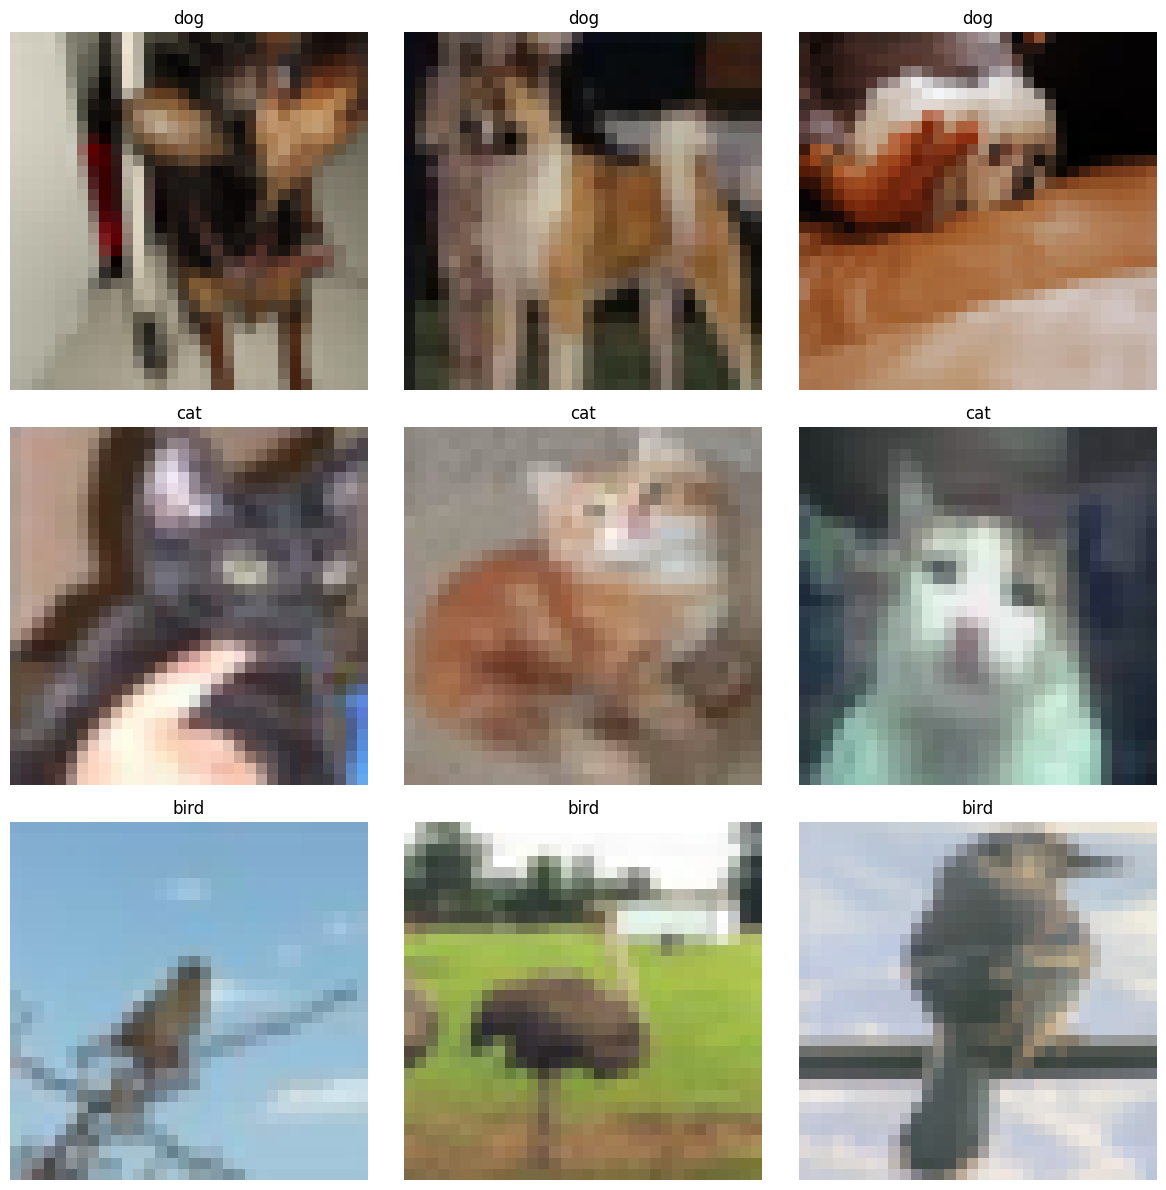

In [11]:
import matplotlib.pyplot as plt
import cv2

num_samples = len(sample_images)
num_cols = 3  # Number of columns for the plot
num_rows = (num_samples + num_cols - 1) // num_cols  # Calculate rows needed

plt.figure(figsize=(12, num_rows * 4))

for i, sample in enumerate(sample_images):
    plt.subplot(num_rows, num_cols, i + 1)
    img_rgb = cv2.cvtColor(sample['image'], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(sample['label'])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The training images in the dataset are organized within a single directory (`/content/dataset/train`), and their labels (dog, cat, bird) are encoded in the filenames.
*   Sample images from each class (dog, cat, bird) were successfully loaded based on their filename prefixes.
*   A total of 9 sample images (3 from each class) were displayed with their corresponding labels.

### Insights or Next Steps

*   The test dataset structure should be examined to understand how test images are organized and if labels are provided separately.
*   The visualization confirms the availability of labeled data for training, which is crucial for supervised learning models.
